# COMP 472 Mini-Project 1

## 1. Dataset Preparation & Analysis 

### 1.2. Load dataset

In [153]:
import json

# 1.1 - 1.2 Download & load dataset
with open("goemotions.json", "r") as f:
    data = json.load(f)

In [154]:
comments = []
emotions = []
sentiments = []

for comment in data:
    comments.append(comment[0])
    emotions.append(comment[1])
    sentiments.append(comment[2])

### 1.3. Data analysis

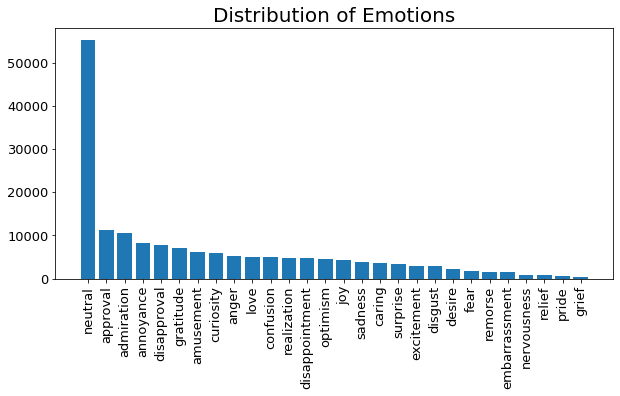

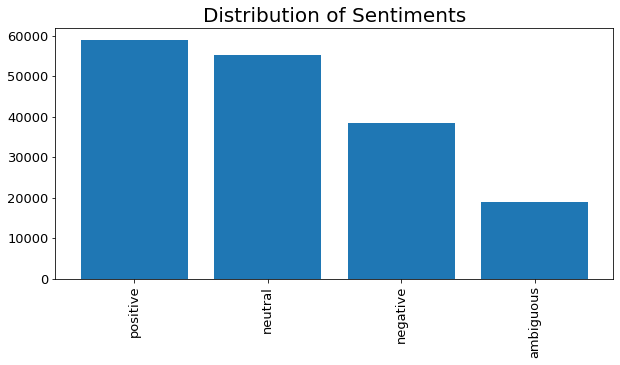

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#dictionary of emotions and frequency count
emotions_count = Counter(emotions)

#tuple of emotion labels, tuple of emotion frequency counts
emotions_labels, emotions_count_values = zip(*emotions_count.items())

#list of emotions_count_values indexes sorted by emotions_count_values in descending order (indexes that would sort in descending order)
emotion_values_indexes_in_desc_order = np.argsort(emotions_count_values)[::-1]

emotions_labels = np.array(emotions_labels)[emotion_values_indexes_in_desc_order]
emotions_count_values = np.array(emotions_count_values)[emotion_values_indexes_in_desc_order]
plt.figure(figsize=(10,6))
plt.tick_params(labelsize=13)
plt.title("Distribution of Emotions", fontsize=20)
plt.xticks(rotation=90)
plt.bar(emotions_labels, emotions_count_values)

# adjustments
plt.subplots_adjust(bottom=0.3)

plt.savefig('Distribution_Emotions.pdf')  

plt.show()

#dictionary of sentiments and frequency count
sentiments_count = Counter(sentiments)

#tuple of sentiment labels, tuple of sentiment frequency counts
sentiment_labels, sentiment_count_values = zip(*sentiments_count.items())

#list of sentiment_count_values indexes sorted by sentiment_count_values in descending order (indexes that would sort in descending order)
sentiment_values_indexes_in_desc_order = np.argsort(sentiment_count_values)[::-1]

sentiment_labels = np.array(sentiment_labels)[sentiment_values_indexes_in_desc_order]
sentiment_count_values = np.array(sentiment_count_values)[sentiment_values_indexes_in_desc_order]

plt.figure(figsize=(10,6))
plt.tick_params(labelsize=13)
plt.title("Distribution of Sentiments", fontsize=20)
plt.xticks(rotation=90)
plt.bar(sentiment_labels, sentiment_count_values)

# adjustments
plt.subplots_adjust(bottom=0.3)

plt.savefig('Distribution_Sentiments.pdf')  

plt.show()



## 2. Words as Features

### 2.1. Dataset preprocessing

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
#extract tokens/words and their frequency
X = vectorizer.fit_transform(comments)

#comments emotion classification
y_emotions = np.array(emotions)
#comments sentiment classification
y_sentiments = np.array(sentiments)
print("Number of tokens in dataset:", len(vectorizer.get_feature_names_out()))

Number of tokens in dataset: 30449


### 2.2. Dataset split

In [157]:
from sklearn.model_selection import train_test_split

#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(X,y_emotions, test_size=0.2)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(X,y_sentiments, test_size=0.2)


### 2.3 
#### Train and test the following classifiers, for both the emotion and the sentiment classification, using word frequency as features.


In [158]:
#function to write confusion matrix, precision, recall and f1-measure to text file.
from sklearn import metrics
from sklearn.metrics import classification_report

def classification_performance(model_prediction, y_test, model_name, hyper_parameters):
    conf_matrix = np.array2string(metrics.confusion_matrix(y_test, model_prediction))
    class_report = classification_report(y_test, model_prediction, zero_division=0)
    print(model_name + " with " + hyper_parameters + ":\n")
    print("\nConfusion Matrix:\n" + conf_matrix + "\n")
    print("\nClassification Report:\n" + class_report + "\n")
    
    with open("performance.txt", "a") as file:
        file.write(model_name + " with " + hyper_parameters + ":\n")
        file.write("\nConfusion Matrix:\n" + conf_matrix + "\n")
        file.write("\nClassification Report:\n" + class_report + "\n")

### 2.3.1. Base-MNB

In [159]:
# Default Parameter Multinomial Naive Bayes Classifier for both emotions and sentiments.

from sklearn.naive_bayes import MultinomialNB

mnb_classifier_emotions = MultinomialNB()
#train MNB emotions model
mnb_model_emotions = mnb_classifier_emotions.fit(X_train_emotions, y_train_emotions)
#test MNB emotions model
mnb_predict_emotions = mnb_model_emotions.predict(X_test_emotions)

mnb_classifier_sentiments = MultinomialNB()
#train MNB sentiments model
mnb_model_sentiments = mnb_classifier_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MNB sentiments model
mnb_predict_sentiments = mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mnb_predict_emotions, y_test_emotions, "Base-MNB emotions", "default parameters")
classification_performance(mnb_predict_sentiments, y_test_sentiments, "Base-MNB sentiments", "default parameters")

Base-MNB emotions with default parameters:


Confusion Matrix:
[[ 936   12    1   10   51    5    2    5    0    2    9    0    1    3
     0   55    0    5   38    0  951   11    0    0    0    0    3    8]
 [  40  357    7   18   10    0    1    1    0    0    5    0    0    2
     0    9    0   13   10    0  741    2    0    4    0    0    0    4]
 [   8    6  119   67    9    3    1    6    0    3   10    9    0    1
     0    6    0    2    1    0  732    2    0    1    0    1    1    2]
 [  21   19   57  107   29    3    7    9    0   14   30    9    2    0
     1   17    0    0    3    0 1336    5    0    2    0    0    2    3]
 [ 116   13    5   21  198    7   13    7    1    3   30    3    0    1
     2   13    0    3   12    0 1756   12    0    4    0    0    8    1]
 [  15    2    4    6   18   45    1    3    0    2    6    0    0    1
     0   14    0    6    6    0  608   14    0    1    0    0    5    0]
 [  11    6    1   11   17    0   47   30    0    2   19    0    0 

### 2.3.2. Base-DT

In [160]:
# Default Parameter Decision Tree Classifier for both emotions and sentiments.

from sklearn import tree

dtc_emotions = tree.DecisionTreeClassifier()
#train DTC emotions model
dtc_model_emotions = dtc_emotions.fit(X_train_emotions, y_train_emotions)
#test DTC emotions model
dtc_predict_emotions = dtc_model_emotions.predict(X_test_emotions)

dtc_sentiments = tree.DecisionTreeClassifier()
#train DTC sentiments model
dtc_model_sentiments = dtc_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test DTC sentiments model
dtc_predict_sentiments = dtc_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(dtc_predict_emotions, y_test_emotions, "Base-DT emotions", "default parameters")
classification_performance(dtc_predict_sentiments, y_test_sentiments, "Base-DT sentiments", "default parameters")

Base-DT emotions with default parameters:


Confusion Matrix:
[[1207   42   14   34  136   22   10   29   15   14   14    9    5   41
     5   58    0   34   78    1  272   20   14    9    4    0    2   19]
 [  57  677   19   48   28    9   20   14    8   10   20    8    6   25
     1    4    1   34   15    0  189    6    0    4    5    3    6    7]
 [  20   29  349  153   39    9   17   16    5   19   39   36    3    4
     3    4    1    2    3    2  219    4    1    3    1    1    5    3]
 [  49   56  229  359  112   34   43   31   14   72  107   43   21    6
    11    9    2    6    9    3  406   10    0   13    1    3   20    7]
 [ 213   56   36  144  603   67   42   33   24   43   74   16    3   24
    10   19    1   32   35    9  629   33    4   41    5    3   14   16]
 [  35   11   27   41   87  202   10    8   13   20   20    1    0    7
     4   10    1   18    8    6  182   20    2    8    1    5    7    3]
 [  20   26   24   59   55   12  243  124    2   16   35    3    7  

### 2.3.3. Base-MLP

In [161]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

from sklearn.neural_network import MLPClassifier

mlp_emotions = MLPClassifier(max_iter=1)
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions)

mlp_sentiments = MLPClassifier(max_iter=1)
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiments", "default parameters")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with default parameters:


Confusion Matrix:
[[1049   21    5    3   15    5    4   11    5    0    8    0    1    4
     0   31    0   25   87    0  786   17    0    1    0    0    4   26]
 [  30  707   12   13    2    0    4    3    5    0    5    1    1    1
     0    6    0   20   15    0  377    6    0    1    0    1    1   13]
 [  10    9  232   21    7    5    0    4    7    2   15   12    0    0
     2    6    0    3    3    0  637    5    0    1    0    2    5    2]
 [  20   47   96   50   11    7    3    6    3    6   23   21    0    0
     6   15    0    5    9    0 1301    9    0    4    0    7   14   13]
 [ 133   33   11    6  131    8   12    4    1    1   18    1    0    5
     7   10    0   25   32    0 1738   30    0    2    0    4   10    7]
 [  20    6    6    1    3   46    2    3    4    1    8    1    1    1
     4    7    0   18   11    0  566   31    0    0    0    9    7    1]
 [  10   23   11    1    4    1   80   36    0    0   10    4    0 

### 2.3.4. Top-MNB

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

search_space_MNB = {
    "alpha" : [0, 0.5, 1.5, 2.0]
}

gs_mnb_emotions = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB emotions model
gs_mnb_model_emotions = gs_mnb_emotions.fit(X_train_emotions, y_train_emotions)
#test GS MNB emotions model
gs_mnb_predict_emotions = gs_mnb_model_emotions.predict(X_test_emotions)


gs_mnb_sentiments = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB sentiments model
gs_mnb_model_sentiments = gs_mnb_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS MNB sentiments model
gs_mnb_predict_sentiments = gs_mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_mnb_predict_emotions, y_test_emotions, "Top-MNB emotions", "alpha : [0, 0.5, 4, 5]")
classification_performance(gs_mnb_predict_sentiments, y_test_sentiments, "Top-MNB sentiments", "alpha : [0, 0.5, 4, 5]")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/ana

Top-MNB emotions with alpha : [0, 0.5, 4, 5]:


Confusion Matrix:
[[1088   23    3   20   76   14    2   13    4    5   16    1    1    9
     1   69    0   19   70    0  630   17    0    5    0    1    3   18]
 [  46  539   15   28   17    0    5    6    1    2   10    2    1    2
     0   11    0   32   15    0  475    3    0    8    0    0    0    6]
 [  10    7  200   94   18    5    3    9    0   11   26   18    1    4
     0    7    0    3    2    0  552    9    0    1    0    1    7    2]
 [  31   32  100  171   45   14   18   16    3   32   65   18    4    1
     2   17    0    1    7    1 1057    9    0    8    0    2   15    7]
 [ 129   28   11   47  284   28   28   14   10   16   47    5    0    6
     4   29    0   11   29    1 1433   30    0   22    0    0   14    3]
 [  19    4    2   12   26  117    2    4    3    5   13    0    0    2
     1   19    0   10    8    0  460   32    0    5    1    3    9    0]
 [  13   12    4   19   28    3  113   65    0    8   29    2   

### 2.3.5. Top-DT

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

search_space_DT = {
    "criterion" : np.array(["entropy"]),
    "max_depth" : np.array([10, 11]),
    "min_samples_split" : np.array([5, 10, 15])
}

gs_dt_emotions = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT emotions model
gs_dt_model_emotions = gs_dt_emotions.fit(X_train_emotions, y_train_emotions)
#test GS DT emotions model
gs_dt_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

gs_dt_sentiments = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT model sentiments
gs_dt_model_sentiments = gs_dt_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS DT model sentiments
gs_dt_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_dt_predict_emotions, y_test_emotions, "Top-DT emotions", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")
classification_performance(gs_dt_predict_sentiments, y_test_sentiments, "Top-DT sentiments", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")

Top-DT emotions with criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15:


Confusion Matrix:
[[  456    11     2     0     0     0     1     1     4     0     1     0
      0     0     0    14     0    28    76     0  1494    18     0     0
      0     2     0     0]
 [   25   396     0     1     0     0     0     0     2     0     1     0
      1     0     0     4     0     7    10     0   766     7     0     0
      0     4     0     0]
 [   16     2     0     0     0     0     0     0     4     0     0     0
      1     0     0     5     0     3     5     0   948     3     0     0
      0     3     0     0]
 [   27    20     0     1     1     1     0     0     4     0     2     1
      0     0     0    12     0     7    11     0  1570    10     0     0
      0     9     0     0]
 [   97    19     0     1     0     0     1     0     2     0     0     0
      0     0     0     6     0    14    30     0  2032    23     0     0
      0     4     0     0]
 [   25     3     0   

### 2.3.6. Top-MLP (3pts)

In [164]:
#Top-MLP
search_space_Top_MLP = {
    'activation' : np.array(['identity', 'logistic', 'tanh', 'relu']),
    'hidden_layer_sizes' : [(30, 50), (10, 10, 10)],
    'solver' : ['adam', 'sgd']
}

gs_mlp_model_emotions = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

# Emotions:
#train GS MLP emotions model
gs_mlp_model_emotions.fit(X_train_emotions, y_train_emotions)

#test GS MLP emotions model
gs_mlp_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

# Sentiments:
gs_mlp_model_sentiments = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

#train GS MLP emotions model
gs_mlp_model_sentiments.fit(X_train_sentiments, y_train_sentiments)

#test GS MLP emotions model
gs_mlp_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

classification_performance(gs_mlp_predict_emotions, y_test_emotions, "Top-MLP emotions", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")
classification_performance(gs_mlp_predict_sentiments, y_test_sentiments, "Top-MLP sentiments", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")


/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

Top-MLP emotions with activation: sigmoid, tanh, relu, identity, solver: adam and sgd:


Confusion Matrix:
[[  456    11     2     0     0     0     1     1     4     0     1     0
      0     0     0    14     0    28    76     0  1494    18     0     0
      0     2     0     0]
 [   25   396     0     1     0     0     0     0     2     0     1     0
      1     0     0     4     0     7    10     0   766     7     0     0
      0     4     0     0]
 [   16     2     0     0     0     0     0     0     4     0     0     0
      1     0     0     5     0     3     5     0   948     3     0     0
      0     3     0     0]
 [   27    20     0     1     1     1     0     0     4     0     2     1
      0     0     0    12     0     7    11     0  1570    10     0     0
      0     9     0     0]
 [   97    19     0     1     0     0     1     0     2     0     0     0
      0     0     0     6     0    14    30     0  2032    23     0     0
      0     4     0     0]
 [   25     3     

### 2.4 (5pts)
#### In each part of 2.3

### 2.5 (7.5pts)

In [165]:
#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(X,y_emotions, test_size=0.7)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(X,y_sentiments, test_size=0.7)


### 2.5.1 Base-MNB

In [166]:
# Default Parameter Multinomial Naive Bayes Classifier for both emotions and sentiments.

# Emotions:
mnb_classifier_emotions = MultinomialNB()
#train MNB emotions model
mnb_model_emotions = mnb_classifier_emotions.fit(X_train_emotions, y_train_emotions)
#test MNB emotions model
mnb_predict_emotions = mnb_model_emotions.predict(X_test_emotions)

# Sentiments
mnb_classifier_sentiments = MultinomialNB()
#train MNB sentiments model
mnb_model_sentiments = mnb_classifier_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MNB sentiments model
mnb_predict_sentiments = mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mnb_predict_emotions, y_test_emotions, "Base-MNB emotions", "default parameters")
classification_performance(mnb_predict_sentiments, y_test_sentiments, "Base-MNB sentiments", "default parameters")

Base-MNB emotions with default parameters:


Confusion Matrix:
[[ 1862    19     2     9    68     5     0     4     0     0     9     0
      0     1     0    86     0    16    38     0  5151    10     0     3
      0     0     2     8]
 [   66   473     3    15    20     0     0     3     0     0     3     0
      0     2     0    14     0    11     9     0  3592     0     0     0
      0     0     1     3]
 [   22    12   122    86    19     3     1     4     0     1    18     3
      0     0     0    12     0     1     1     0  3380     3     0     1
      0     1     0     4]
 [   40    23    29    98    42     1     3     2     0     1    20     6
      0     1     2    16     0     1     3     0  5635     1     0     1
      0     0     4     6]
 [  168    18     2    29   271     2     5     6     0     3    30     1
      0     4     1    17     0     3    16     0  7205     7     0    11
      0     0     3     2]
 [   32     0     2     1    16    16     1     1     0     2 

### 2.5.2 Base-DT

In [167]:
# Default Parameter Decision Tree Classifier for both emotions and sentiments.

# Emotions:
dtc_emotions = tree.DecisionTreeClassifier()
#train DTC emotions model
dtc_model_emotions = dtc_emotions.fit(X_train_emotions, y_train_emotions)
#test DTC emotions model
dtc_predict_emotions = dtc_model_emotions.predict(X_test_emotions)

# Sentiments:
dtc_sentiments = tree.DecisionTreeClassifier()
#train DTC sentiments model
dtc_model_sentiments = dtc_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test DTC sentiments model
dtc_predict_sentiments = dtc_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(dtc_predict_emotions, y_test_emotions, "Base-DT emotions", "default parameters")
classification_performance(dtc_predict_sentiments, y_test_sentiments, "Base-DT sentiments", "default parameters")

Base-DT emotions with default parameters:


Confusion Matrix:
[[ 3337   157    69   119   466    79    69    84    55    52    76    24
     15   175    19   257     8   169   298    10  1403   111    42    63
     17     6    22    91]
 [  199  2096    56   124   131    32    43    48    11    36    73    34
     20    56    29    40     0   225    32     4   768    40     1    43
      3     8    26    37]
 [   76    94   880   459   152    44    74    79    25   113   158   126
     25    26    38    23     4    21    33     7  1088    34     3    25
      4     6    36    41]
 [  178   205   495   792   363   115   163   165    42   203   388   183
     60    57    63    55     6    71    65    29  1885    62     8    94
      6    28    88    66]
 [  569   193   114   368  1409   186   175   130    91   173   313    58
     42   115    42    87    11   125   130    24  2909   173    29   162
     27    24    58    67]
 [  125    43    43    99   220   417    40    39    34    68  

### 2.5.3 Base-MLP

In [168]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

mlp_emotions = MLPClassifier(max_iter=1)
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions)

mlp_sentiments = MLPClassifier(max_iter=1)
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiments", "default parameters")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with default parameters:


Confusion Matrix:
[[ 2829    66     0     1     6     0     0     2     0     0     2     0
      0     0     0    99     0    36   242     0  3979    27     0     0
      0     2     0     2]
 [  126  2023     1     0     2     0     0     1     0     0     3     0
      0     0     0    26     0    10    30     0  1988     5     0     0
      0     0     0     0]
 [   33    39    43    10     6     1     1     0     0     0     6     0
      0     0     0    20     0     5    20     0  3501     8     0     0
      0     0     1     0]
 [   75   121    13     9    16     2     0     0     0     0    10     0
      0     0     0    59     0     5    47     0  5561    14     0     0
      0     2     1     0]
 [  319    83     0     2   112     1     0     6     0     0     5     0
      0     0     0    40     0    17    97     0  7086    32     0     0
      0     3     1     0]
 [  122    21     0     0     4     5     0     0     0     0 

### 2.5.4 Top-MNB

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

search_space_MNB = {
    "alpha" : [0, 0.5, 1.5, 2.0]
}

gs_mnb_emotions = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB emotions model
gs_mnb_model_emotions = gs_mnb_emotions.fit(X_train_emotions, y_train_emotions)
#test GS MNB emotions model
gs_mnb_predict_emotions = gs_mnb_model_emotions.predict(X_test_emotions)


gs_mnb_sentiments = GridSearchCV(estimator=MultinomialNB(), param_grid = search_space_MNB)
#train GS MNB sentiments model
gs_mnb_model_sentiments = gs_mnb_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS MNB sentiments model
gs_mnb_predict_sentiments = gs_mnb_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_mnb_predict_emotions, y_test_emotions, "Top-MNB emotions", "alpha : [0, 0.5, 1.5, 2.0]")
classification_performance(gs_mnb_predict_sentiments, y_test_sentiments, "Top-MNB sentiments", "alpha : [0, 0.5, 1.5, 2.0]")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/michaeldjabauri/opt/ana

Top-MNB emotions with alpha : [0, 0.5, 1.5, 2.0]:


Confusion Matrix:
[[ 2803    40    11    35   184    11     5    20     1     5    20     1
      1    13     0   171     0    50   116     0  3737    26     0    13
      0     0     5    25]
 [  134  1023    13    47    70     1     6     8     0     1    23     3
      1    10     1    31     0    28    16     0  2777     4     0     9
      0     0     1     8]
 [   38    29   293   224    66     7    13    11     1    24    63    20
      0     1     4    15     0     7     2     0  2844    10     0     4
      0     2     6    10]
 [   90    58    98   322   154    11    28    20     0    36   131    28
      1     2     5    44     0     9    14     0  4825    12     0    20
      0     2    17     8]
 [  325    57    13    96   668    20    35    19     2    16   101     6
      0    14     1    53     0    16    45     0  6211    43     0    33
      0     1    17    12]
 [   54     5     4    18    64    82     3     4     1

### 2.5.5 Top-DT

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

search_space_DT = {
    "criterion" : np.array(["entropy"]),
    "max_depth" : np.array([10, 11]),
    "min_samples_split" : np.array([5, 10, 15])
}

gs_dt_emotions = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT emotions model
gs_dt_model_emotions = gs_dt_emotions.fit(X_train_emotions, y_train_emotions)
#test GS DT emotions model
gs_dt_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

gs_dt_sentiments = GridSearchCV(tree.DecisionTreeClassifier(), search_space_DT)
#train GS DT model sentiments
gs_dt_model_sentiments = gs_dt_sentiments.fit(X_train_sentiments, y_train_sentiments)
#test GS DT model sentiments
gs_dt_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(gs_dt_predict_emotions, y_test_emotions, "Top-DT emotions", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")
classification_performance(gs_dt_predict_sentiments, y_test_sentiments, "Top-DT sentiments", "criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15")

Top-DT emotions with criterion: entropy, max_depth: 10, 11, min_sample: 5, 10, 15:


Confusion Matrix:
[[ 1545    37     2     0     1     0     0     1     3     0     0     0
      1     7     2    52     0   119   281     0  5170    64     0     0
      1     7     0     0]
 [   92  1400     4     0     0     3     0     3     0     0     1     5
      1     4     0    25     0    19    30     0  2603    17     0     1
      1     6     0     0]
 [   58    25     2     0     0     1     1     0     0     0     0     0
      0     2     0    16     0    15    19     0  3536     8     0     0
      0    11     0     0]
 [   97    80     2     8     1     2     1     1     0     0     3     0
      0     0     0    41     0    24    52     0  5575    24     0     0
      0    23     0     1]
 [  344    63     0     0     0     5     1     0     0     1     0     1
      0     0     0    27     0    62   107     0  7108    60     0     0
      0    22     3     0]
 [  100    14     0   

### 2.5.6 Top-MLP

In [171]:
#Top-MLP
search_space_Top_MLP = {
    'activation' : np.array(['identity', 'logistic', 'tanh', 'relu']),
    'hidden_layer_sizes' : [(30, 50), (10, 10, 10)],
    'solver' : ['adam', 'sgd']
}

gs_mlp_model_emotions = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

# Emotions:
#train GS MLP emotions model
gs_mlp_model_emotions.fit(X_train_emotions, y_train_emotions)

#test GS MLP emotions model
gs_mlp_predict_emotions = gs_dt_model_emotions.predict(X_test_emotions)

# Sentiments:
gs_mlp_model_sentiments = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP)

#train GS MLP emotions model
gs_mlp_model_sentiments.fit(X_train_sentiments, y_train_sentiments)

#test GS MLP emotions model
gs_mlp_predict_sentiments = gs_dt_model_sentiments.predict(X_test_sentiments)

classification_performance(gs_mlp_predict_emotions, y_test_emotions, "Top-MLP emotions", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")
classification_performance(gs_mlp_predict_sentiments, y_test_sentiments, "Top-MLP sentiments", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")





/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

Top-MLP emotions with activation: sigmoid, tanh, relu, identity, solver: adam and sgd:


Confusion Matrix:
[[ 1545    37     2     0     1     0     0     1     3     0     0     0
      1     7     2    52     0   119   281     0  5170    64     0     0
      1     7     0     0]
 [   92  1400     4     0     0     3     0     3     0     0     1     5
      1     4     0    25     0    19    30     0  2603    17     0     1
      1     6     0     0]
 [   58    25     2     0     0     1     1     0     0     0     0     0
      0     2     0    16     0    15    19     0  3536     8     0     0
      0    11     0     0]
 [   97    80     2     8     1     2     1     1     0     0     3     0
      0     0     0    41     0    24    52     0  5575    24     0     0
      0    23     0     1]
 [  344    63     0     0     0     5     1     0     0     1     0     1
      0     0     0    27     0    62   107     0  7108    60     0     0
      0    22     3     0]
 [  100    14     

## 3. Embeddings as Features

### 3.1.

In [172]:
import gensim.downloader as api
from gensim.models import Word2Vec

wv = api.load('word2vec-google-news-300')

### 3.2.

In [173]:
# 3.2  Use the tokenizer from nltk to extract words from the Reddit posts. Display the number
# of tokens in the training set.
from nltk.tokenize import word_tokenize

def comment_tokenizer(comments):
    tokenized_comments = []

    for comment in comments:
        token_comment = word_tokenize(comment)
        tokenized_comments.append(token_comment)
    return tokenized_comments

### 3.3.

In [174]:
# 3.3 Compute the embedding of a Reddit post as the average of the embeddings of its words. If
# a word has no embedding in Word2Vec, skip it.

def embedded_comments(tokenized_comments):
    comment_embeddings = []
    hit_count = 0
    token_count = 0
    
    for comment in tokenized_comments:
        comment_token_embeddings = []
        for token in comment:
            token_count += 1
            try:
                embedded_token = wv[token]
                comment_token_embeddings.append(embedded_token)
                hit_count += 1
            except KeyError:
                pass
        if len(comment_token_embeddings) != 0: 
            tkn_embdng = np.array(comment_token_embeddings)
            comment_embeddings.append(np.mean(tkn_embdng, axis=0))
        else:
            comment_embeddings.append(np.zeros(300))
    return comment_embeddings, hit_count, token_count

In [175]:
from sklearn.model_selection import train_test_split

#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(comments,y_emotions, test_size=0.2)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(comments,y_sentiments, test_size=0.2)


In [176]:
tokenized_X_train_emotions = comment_tokenizer(X_train_emotions)
tokenized_X_test_emotions = comment_tokenizer(X_test_emotions)
tokenized_X_train_sentiments = comment_tokenizer(X_train_sentiments)
tokenized_X_test_sentiments = comment_tokenizer(X_test_sentiments)

In [177]:
X_train_emotions_embeddings, X_train_emotions_hit_count, X_train_emotions_token_count = embedded_comments(tokenized_X_train_emotions)
X_test_emotions_embeddings, X_test_emotions_hit_count, X_test_emotions_token_count = embedded_comments(tokenized_X_test_emotions)
X_train_sentiments_embeddings, X_train_sentiments_hit_count, X_train_sentiments_token_count = embedded_comments(tokenized_X_train_sentiments)
X_test_sentiments_embeddings, X_test_sentiments_hit_count, X_test_sentiments_token_count = embedded_comments(tokenized_X_test_sentiments)


In [178]:
print("Number of tokens in the training set: "+ str(X_train_emotions_token_count))


Number of tokens in the training set: 2112688


### 3.4.

In [179]:
X_train_emotions_hit_rate = X_train_emotions_hit_count / X_train_emotions_token_count
print("Emotions training dataset hit rate", X_train_emotions_hit_rate)

X_test_emotions_hit_rate = X_test_emotions_hit_count / X_test_emotions_token_count
print("Emotions test dataset hit rate", X_test_emotions_hit_rate)

X_train_sentiments_hit_rate = X_train_sentiments_hit_count / X_train_sentiments_token_count
print("Sentiments test dataset hit rate", X_train_sentiments_hit_rate)

X_test_sentiments_hit_rate = X_test_sentiments_hit_count / X_test_sentiments_token_count
print("Sentiments test dataset hit rate", X_test_sentiments_hit_rate)

Emotions training dataset hit rate 0.7745251546844588
Emotions test dataset hit rate 0.7744314747657902
Sentiments test dataset hit rate 0.7745826903529737
Sentiments test dataset hit rate 0.7742029061947836


### 3.5.

In [180]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

from sklearn.neural_network import MLPClassifier

mlp_emotions = MLPClassifier()
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions_embeddings, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions_embeddings)

mlp_sentiments = MLPClassifier()
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments_embeddings, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments_embeddings)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions with embeddings", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiment swith embeddings", "default parameters")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with embeddings with default parameters:


Confusion Matrix:
[[1026   32   12   11   45    5    0   10    5    1    9    5    2   11
     4   67    1   45  107    0  626   27    5    0    2    2    7   18]
 [  67  503   15   21   10    2    6    6    1    0    6    4    1    4
     0   16    0   44   23    0  476    5    0    1    0    4    8    9]
 [  13   15  236   77    2    2    6    7    3    4   22   25    2    0
     9    6    0    1    5    1  566    6    0    0    0    4    7    6]
 [  32   36  138  136   17    3   13   20    5   13   43   26    9    0
     3   22    1    5   20    5 1136    4    0    0    1    5   16   11]
 [ 165   43   22   27  154   18   16   12   11    8   42   14    1    4
     6   22    1   26   48    2 1641   25    3    0    4   11    9    6]
 [  22    5    9    9    9   77    1    8    5    2    9    1    0    3
     2   22    0   13   10    3  460   29    0    0    0   18   16    1]
 [  20   16   16    9    8    4   95   97    0    2

### 3.6.

In [181]:
search_space_Top_MLP_emb = {
    'activation' : np.array(['identity', 'logistic', 'tanh', 'relu']),
    'hidden_layer_sizes' : [(30, 50), (10, 10, 10)],
    'solver' : ['adam', 'sgd']
}

GS_MLP_emotions = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP_emb)
#train GS MLP emotions model
GS_MLP_model_emotions = GS_MLP_emotions.fit(X_train_emotions_embeddings, y_train_emotions)
#test GS MLP emotions model
GS_MLP_predict_emotions = GS_MLP_model_emotions.predict(X_test_emotions_embeddings)

GS_MLP_sentiments = GridSearchCV(MLPClassifier(max_iter=1), search_space_Top_MLP_emb)
#train GS MLP sentiments model
GS_MLP_model_sentiments = GS_MLP_sentiments.fit(X_train_sentiments_embeddings, y_train_sentiments)
#test GS MLP sentiments model
GS_MLP_predict_sentiments = GS_MLP_model_sentiments.predict(X_test_sentiments_embeddings)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(GS_MLP_predict_emotions, y_test_emotions, "Top-MLP emotions with embeddings", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")
classification_performance(GS_MLP_predict_sentiments, y_test_sentiments, "Top-MLP sentiment swith embeddings", "activation: sigmoid, tanh, relu, identity, solver: adam and sgd")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warning

Top-MLP emotions with embeddings with activation: sigmoid, tanh, relu, identity, solver: adam and sgd:


Confusion Matrix:
[[  756    32     1     0     2     2     1     3     0     0     0     0
      0     0     0    54     0     4    67     0  1162     1     0     0
      0     0     0     0]
 [   54   257     2     2     0     0     0     1     0     0     1     1
      0     0     0    16     0     2     9     0   886     1     0     0
      0     0     0     0]
 [    3    20    85     9     0     1     0     3     0     0     3     5
      0     0     0     5     0     0    16     0   872     0     0     0
      0     0     3     0]
 [   11    39    32     8     0     0     3     2     0     0     6    10
      0     0     0    17     0     0    14     0  1568     0     0     0
      0     1     9     0]
 [  113    25     9     2     1     4     0     0     0     0     8     0
      0     0     0    33     0     0    29     0  2110     7     0     0
      0     0     0     0]
 [

### 3.7 as seen above

### 3.8

### 3.8.1 (using Base-MLP)

In [182]:
wv_model_gigaword = api.load("glove-wiki-gigaword-100")
print("New Model loaded!")


New Model loaded!


### 3.8.2

In [183]:
# 3.2  Use the tokenizer from nltk to extract words from the Reddit posts. Display the number
# of tokens in the training set.

def comment_tokenizer(comments):
    tokenized_comments = []

    for comment in comments:
        token_comment = word_tokenize(comment)
        tokenized_comments.append(token_comment)
    return tokenized_comments

### 3.8.3

In [184]:
# 3.3 Compute the embedding of a Reddit post as the average of the embeddings of its words. If
# a word has no embedding in Word2Vec, skip it.

def embedded_comments(tokenized_comments):
    comment_embeddings = []
    hit_count = 0
    token_count = 0
    
    for comment in tokenized_comments:
        comment_token_embeddings = []
        for token in comment:
            token_count += 1
            try:
                embedded_token = wv_model_gigaword[token]
                comment_token_embeddings.append(embedded_token)
                hit_count += 1
            except KeyError:
                pass
        if len(comment_token_embeddings) != 0: 
            tkn_embdng = np.array(comment_token_embeddings)
            comment_embeddings.append(np.mean(tkn_embdng, axis=0))
        else:
            comment_embeddings.append(np.zeros(100))
    return comment_embeddings, hit_count, token_count

In [185]:
from sklearn.model_selection import train_test_split

#split dataset for emotions classification
X_train_emotions, X_test_emotions, y_train_emotions, y_test_emotions = train_test_split(comments,y_emotions, test_size=0.2)

#split dataset for sentiments classification
X_train_sentiments, X_test_sentiments, y_train_sentiments, y_test_sentiments = train_test_split(comments,y_sentiments, test_size=0.2)


In [186]:
tokenized_X_train_emotions = comment_tokenizer(X_train_emotions)
tokenized_X_test_emotions = comment_tokenizer(X_test_emotions)
tokenized_X_train_sentiments = comment_tokenizer(X_train_sentiments)
tokenized_X_test_sentiments = comment_tokenizer(X_test_sentiments)

In [187]:
X_train_emotions_embeddings, X_train_emotions_hit_count, X_train_emotions_token_count = embedded_comments(tokenized_X_train_emotions)
X_test_emotions_embeddings, X_test_emotions_hit_count, X_test_emotions_token_count = embedded_comments(tokenized_X_test_emotions)
X_train_sentiments_embeddings, X_train_sentiments_hit_count, X_train_sentiments_token_count = embedded_comments(tokenized_X_train_sentiments)
X_test_sentiments_embeddings, X_test_sentiments_hit_count, X_test_sentiments_token_count = embedded_comments(tokenized_X_test_sentiments)


In [188]:
print("Number of tokens in the training set: "+ str(X_train_emotions_token_count))

Number of tokens in the training set: 2114004


### 3.8.4

In [189]:
X_train_emotions_hit_rate = X_train_emotions_hit_count / X_train_emotions_token_count
print("Emotions training dataset hit rate", X_train_emotions_hit_rate)

X_test_emotions_hit_rate = X_test_emotions_hit_count / X_test_emotions_token_count
print("Emotions test dataset hit rate", X_test_emotions_hit_rate)

X_train_sentiments_hit_rate = X_train_sentiments_hit_count / X_train_sentiments_token_count
print("Sentiments test dataset hit rate", X_train_sentiments_hit_rate)

X_test_sentiments_hit_rate = X_test_sentiments_hit_count / X_test_sentiments_token_count
print("Sentiments test dataset hit rate", X_test_sentiments_hit_rate)

Emotions training dataset hit rate 0.8536365115676224
Emotions test dataset hit rate 0.852619839280169
Sentiments test dataset hit rate 0.8536086802949984
Sentiments test dataset hit rate 0.8527298210211486


### 3.8.5

In [190]:
# Default Parameter Perceptron Classifier for both emotions and sentiments.

from sklearn.neural_network import MLPClassifier

mlp_emotions = MLPClassifier()
#train MLP emotions model
mlp_model_emotions = mlp_emotions.fit(X_train_emotions_embeddings, y_train_emotions)
#test MLP emotions model
mlp_predict_emotions = mlp_model_emotions.predict(X_test_emotions_embeddings)

mlp_sentiments = MLPClassifier()
#train MLP sentiments model
mlp_model_sentiments = mlp_sentiments.fit(X_train_sentiments_embeddings, y_train_sentiments)
#test MLP sentiments model
mlp_predict_sentiments = mlp_model_sentiments.predict(X_test_sentiments_embeddings)

#write confusion matrix, precision, recall and f1-measure to text file for both emotions and sentiments.
classification_performance(mlp_predict_emotions, y_test_emotions, "Base-MLP emotions with embeddings", "default parameters")
classification_performance(mlp_predict_sentiments, y_test_sentiments, "Base-MLP sentiment swith embeddings", "default parameters")

/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldjabauri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions with embeddings with default parameters:


Confusion Matrix:
[[ 789   23    7    6    5    1    0    5    0    1    4    3    1   14
     2   65    0   18   75    0 1044   25    4    0    0    1    4    2]
 [  68  351   11   20    3    0    2    8    1    4    6    2    0    1
     1   13    0   21   17    0  747    7    0    0    0    7    7    1]
 [  15   14  114   56    0    1    1   10    1    4    5    9    0    0
     7    8    0    1    8    0  733    1    0    0    0    4   12    0]
 [  32   31   51   71    0    7    1    7    4    6   30   13    1    2
     5   11    0    7   12    0 1280    1    0    0    0   10   28    2]
 [ 140   30    8   20   31    7    3   13    2    1   24    5    0    6
     1   51    0   14   42    0 1892   15    0    0    0    8   16    3]
 [  25    4    3    3    3   38    0    1    1    0    7    0    0    0
     1   46    0    6   13    0  489   28    0    0    0    7   13    0]
 [  14    6    5    8    3    1    7   87    1    1

### 3.8.7 As seen above